In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from data_structure import test
test

<module 'data_structure.test' from 'D:\\4399IronMan\\p\\qa\\PTQACode\\ML4M\\data_structure\\test.py'>

In [2]:
import os
os.getcwd()

'D:\\4399IronMan\\p\\qa\\PTQACode\\ML4M\\notebook'

In [3]:
%%time
# %prun
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from common.log import *
from data_structure import DataStructure as ds
from machine_learning.kNN import kNN
from concurrent.futures import ProcessPoolExecutor
import itertools
import time

f = '../database/TSLA-HistoricalQuotes-20100629-20180416.csv'
stock_data = pd.read_csv(f)
stock_data = stock_data.drop([0])
stock_data = stock_data.drop(columns=['open', 'high', 'low'])
print(stock_data.head())

         date   close         volume
1  2018/04/16  291.21   6289497.0000
2  2018/04/13  300.34   7319225.0000
3  2018/04/12  294.08   7595525.0000
4  2018/04/11  300.93   7470204.0000
5  2018/04/10  304.70  11017010.0000
Wall time: 254 ms


In [4]:
%%time
stock_data['date'] = stock_data['date'].apply(lambda x: pd.Period(x, freq='D'))
stock_data = stock_data.astype(dtype={'volume': 'float64'})

Wall time: 1.2 s


In [5]:
%%time
stock_data.set_index(['date'], inplace=True)
stock_data = stock_data.sort_index(axis=0, ascending=True)

Wall time: 950 ms


In [6]:
%%time
spider_36kr_data_file = '../database/36kr_特斯拉.txt'
news_data = ds.handle_36kr(spider_36kr_data_file)

Wall time: 3min 50s


In [7]:
%%time
news_data = news_data.groupby('publish_time').agg({'news_id': ['size'], 'sentiment': ['mean']})
news_data.columns = ['News_count', 'News_sentiment']

Wall time: 661 ms


In [8]:
%%time
result_df = pd.merge(stock_data, news_data, how='left', left_index=True, right_index=True)
result_df = result_df.loc[:, ['close', 'volume', 'News_count', 'News_sentiment']]
result_df = result_df.fillna(value={'News_count': 0, 'News_sentiment': 0})

Wall time: 27.1 ms


In [9]:
result_df = result_df.loc['2017-01-01':]
result_df = result_df.reset_index(drop=False)
result_df

,date,close,volume,News_count,News_sentiment
0,2017-01-03,216.99,5901494.0,6.0,0.497272
1,2017-01-04,226.99,11204560.0,13.0,0.508156
2,2017-01-05,226.75,5908927.0,7.0,0.698690
3,2017-01-06,229.01,5524153.0,8.0,0.642551
4,2017-01-09,231.28,3972716.0,9.0,0.411771
5,2017-01-10,229.87,3658981.0,8.0,0.347719
6,2017-01-11,229.73,3649910.0,5.0,0.403148
7,2017-01-12,229.59,3787547.0,11.0,0.633660
8,2017-01-13,237.75,6085610.0,11.0,0.420785
9,2017-01-17,235.58,4614731.0,5.0,0.834862


In [10]:
for a, b in enumerate(result_df.close):
    print(a, b)

0 216.99
1 226.99
2 226.75
3 229.01
4 231.28
5 229.87
6 229.73
7 229.59
8 237.75
9 235.58
10 238.36
11 243.76
12 244.73
13 248.92
14 254.61
15 254.47
16 252.51
17 252.95
18 250.63
19 251.93
20 249.24
21 251.55
22 251.33
23 257.77
24 257.48
25 262.08
26 269.2
27 269.23
28 280.6
29 280.98
30 279.76
31 268.95
32 272.23
33 277.39
34 273.51
35 255.99
36 257.0
37 246.23
38 249.99
39 250.02
40 250.48
41 251.57
42 251.21
43 248.59
44 246.87
45 244.9
46 243.69
47 246.17
48 258.0
49 255.73
50 262.05
51 261.5
52 261.92
53 250.68
54 255.01
55 254.78
56 263.16
57 270.22
58 277.45
59 277.38
60 277.92
61 278.3
62 298.52
63 303.7
64 295.0
65 298.7
66 302.54
67 312.39
68 308.71
69 296.84
70 304.0
71 301.44
72 300.25
73 305.52
74 302.51
75 305.6
76 308.03
77 313.79
78 310.17
79 308.63
80 314.07
81 322.83
82 318.89
83 311.02
84 295.46
85 308.35
86 307.19
87 321.26
88 325.22
89 323.1
90 324.81
91 315.88
92 317.01
93 306.11
94 313.06
95 310.83
96 310.35
97 303.86
98 310.22
99 316.83
100 325.14
101 335.1
10

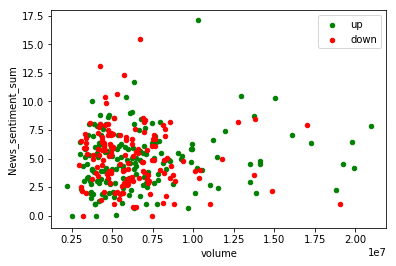

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df = result_df.copy()
# print(id(df), id(result_df))
offset_day = 3
df['Close_change'] = '-'

for i in range(0, len(df), 1):
    try:
        df.loc[i, 'Close_change'] = 'UP' if df.loc[i + offset_day, 'close'] > df.loc[i, 'close'] else 'DOWN'
        df.loc[i, 'News_sentiment_sum'] = df.loc[i, 'News_sentiment'] * df.loc[i, 'News_count']
    except Exception as e:
        pass

# result_df
up_df = df.loc[df.Close_change == 'UP', :]
# up_df
down_df = df.loc[df.Close_change == 'DOWN', :]
# down_df
ax = up_df.plot(kind='scatter', x='volume', y='News_sentiment_sum', label='up', color='Green')
ax = down_df.plot(kind='scatter', x='volume', y='News_sentiment_sum', label='down', color='Red', ax=ax)
# plt.figure()
# plt.show()